In [8]:
pip install numpy matplotlib scikit-learn pandas graphviz

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 594.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


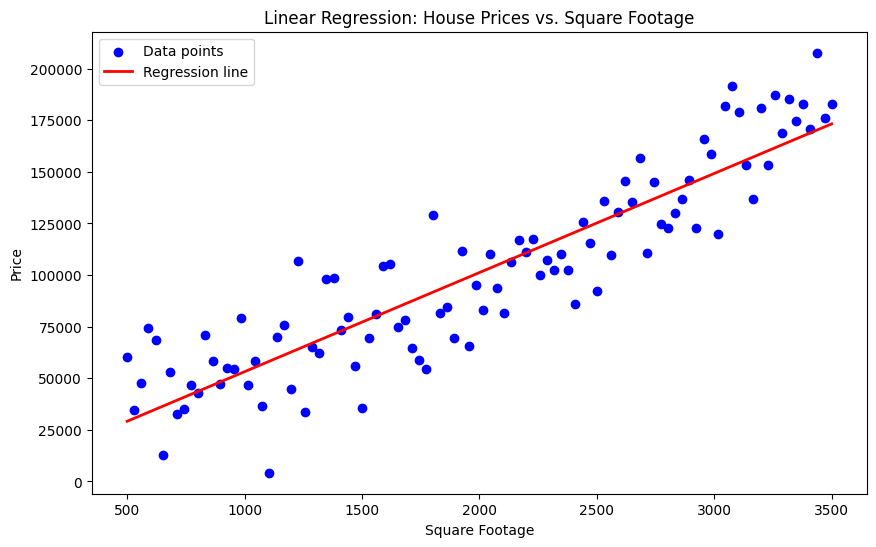

Mean Squared Error (MSE): 403324341.39


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)  # For reproducibility
square_footage = np.linspace(500, 3500, 100)  # Feature: square footage
prices = 50 * square_footage + np.random.normal(0, 20000, 100)  # Target: house prices with some noise

# Reshape data
X = square_footage.reshape(-1, 1)  # Features
y = prices  # Target

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict house prices
y_pred = model.predict(X)

# Plot data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Linear Regression: House Prices vs. Square Footage')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


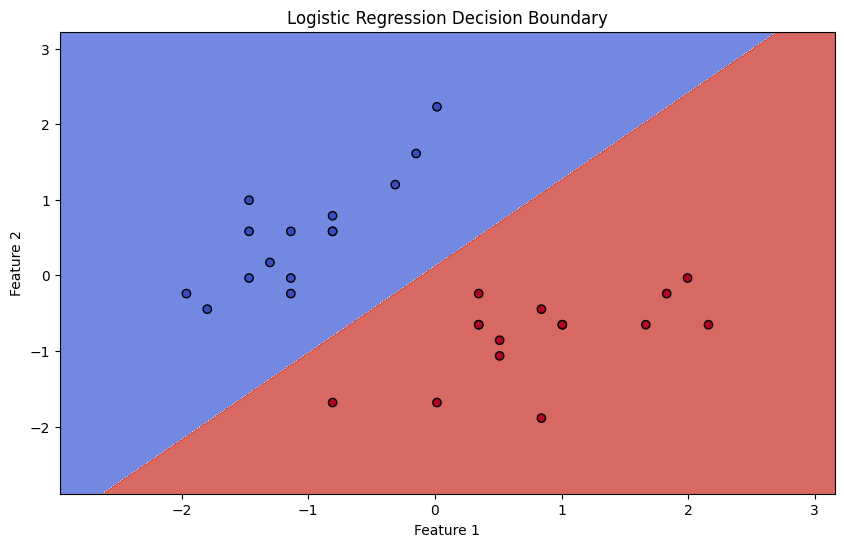

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter to include only two classes (0 and 1) for binary classification
X = X[y != 2]
y = y[y != 2]

# Features: take only two features for visualization (e.g., sepal length and sepal width)
X = X[:, :2]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Define a function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_test, y_test, model, "Logistic Regression Decision Boundary")

Accuracy for k=1: 0.99
Accuracy for k=3: 0.99
Accuracy for k=5: 0.98
Accuracy for k=7: 0.98
Accuracy for k=9: 0.98


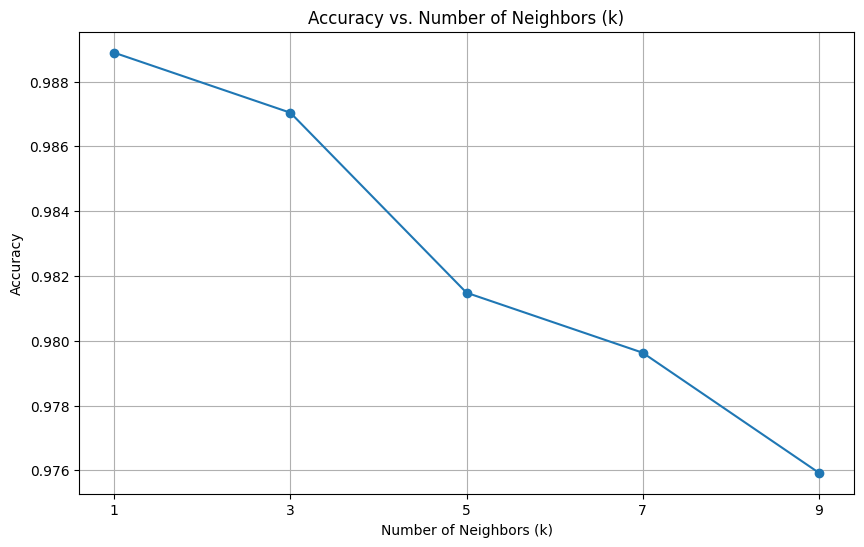

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define different k values to test
k_values = [1, 3, 5, 7, 9]

# Store results
results = {}

for k in k_values:
    # Initialize and train KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}")

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, list(results.values()), marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

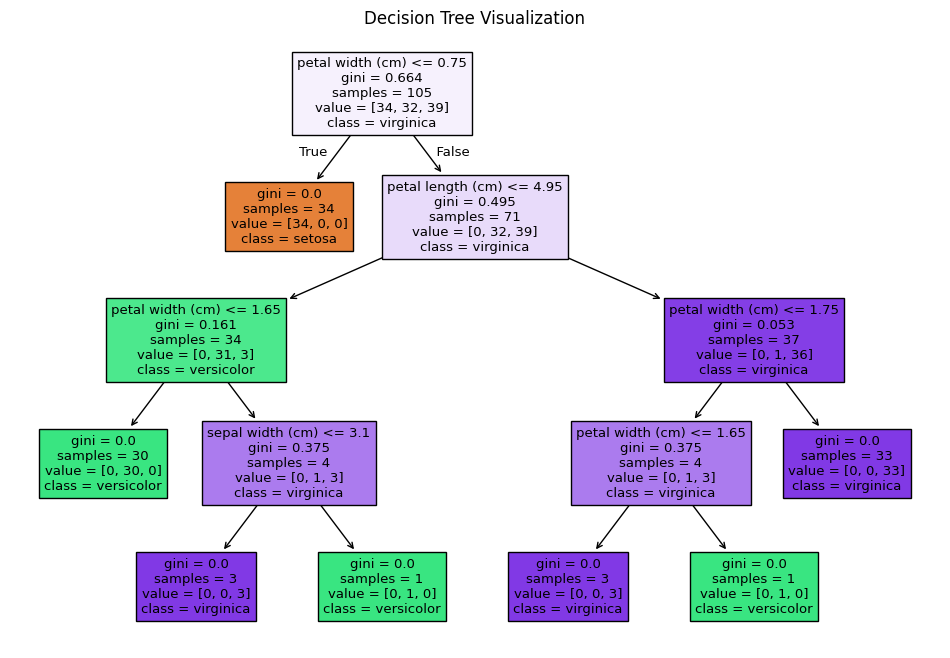

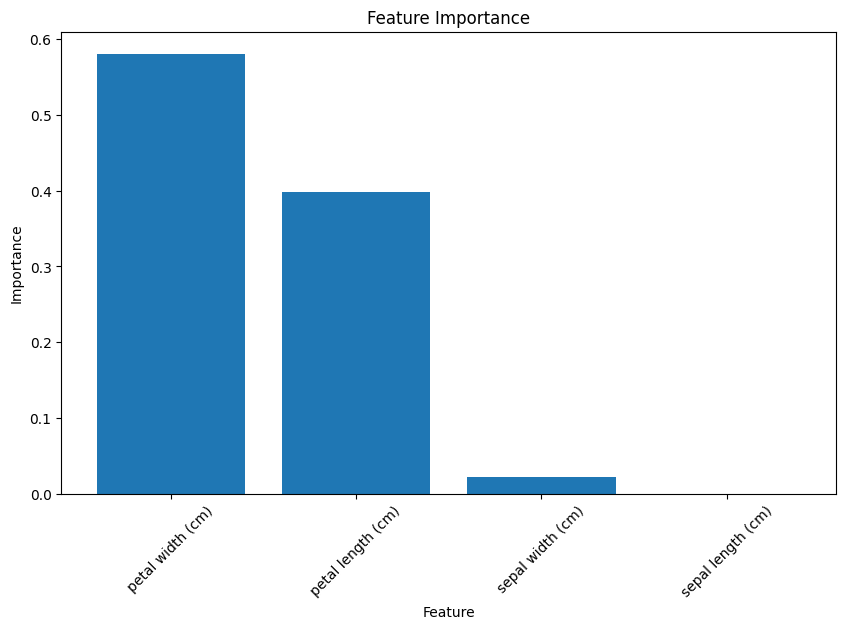

Accuracy: 0.98


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Analyze and plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the dataset
data = pd.read_csv('emails.csv')
data.head()

,text,label
0,Subject: Get a Free iPhone X,1
1,Subject: Exclusive Investment Opportunity,1
2,Subject: Meeting Agenda for Tomorrow,0
3,Subject: Important Updates on Your Account,1
4,Subject: Invitation to a Birthday Party,0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], random_state=1)

print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5754
Number of rows in the training set: 4315
Number of rows in the test set: 1439


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data, transform the test data

# Fit the training data and then return the matrix
training_data = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vectorizer.transform(X_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.8957609451007644
Precision score: 1.0
Recall score: 0.5702005730659025
F1 score: 0.7262773722627737


In [20]:
email_text_1 = ["Subject: Meeting Agenda for Tomorrow"]  # Example 1: Not Spam
email_text_2 = ["Subject: Get a Free iPhone X!!"] # Example 2: Spam
email_text_3 = ["Subject: Invitation to a Birthday Party"] # Example 3: Not Spam
email_text_4 = ["Subject: Important Updates on Your Account"] # Example 4: Spam
email_text_5 = ["Subject: Dinner Plans for This Friday"] # Example 5: Not Spam
email_text_6 = ["Subject: Claim Your Prize Now!"] # Example 6: Spam

examples = [email_text_1, email_text_2, email_text_3, email_text_4, email_text_5, email_text_6]

for i, example in enumerate(examples):
    example_vector = tfidf_vectorizer.transform(example)
    prediction = naive_bayes.predict(example_vector)
    if prediction[0] == 1:
        print(f"Example {i+1}: Spam")
    else:
        print(f"Example {i+1}: Not Spam")


Example 1: Not Spam
Example 2: Not Spam
Example 3: Not Spam
Example 4: Not Spam
Example 5: Not Spam
Example 6: Spam


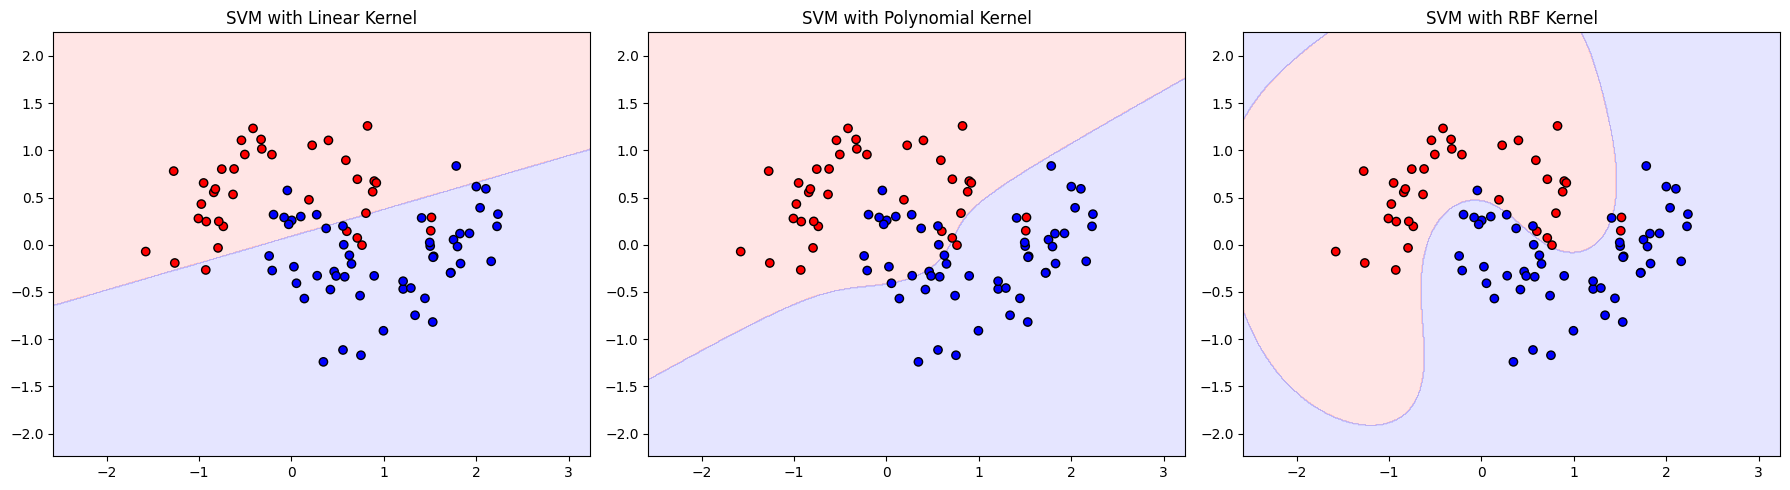

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=300, noise=0.3, random_state=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def plot_decision_boundary(X, y, clf, title, ax):
    # Set the limits of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict class labels for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_title(title)

# Initialize the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Linear Kernel
clf_linear = SVC(kernel='linear', C=1.0)
clf_linear.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, clf_linear, 'SVM with Linear Kernel', axs[0])

# Polynomial Kernel (degree 3)
clf_poly = SVC(kernel='poly', degree=3, C=1.0)
clf_poly.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, clf_poly, 'SVM with Polynomial Kernel', axs[1])

# RBF Kernel
clf_rbf = SVC(kernel='rbf', gamma=1.0, C=1.0)
clf_rbf.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, clf_rbf, 'SVM with RBF Kernel', axs[2])

# Adjust layout and show plot
plt.tight_layout()
plt.show()